### Oral Assignment/ NLP & Computer Vision - Source Code f. SIFT implementation

TOC:
- create SIFT extractor
- create brute force matcher
- scale invariance (course book vs. course book on table), SIFT
- rotational invariance (course book on table vs. course book on table transposed), SIFT
- translational invariance (course book vs. course book under stack of other books), SIFT

In [1]:
#importing necessary python library
import cv2 as cv
from matplotlib import pyplot as plt

#loading images and converting to grayscale
img_1 = cv.imread("../data/coursebook_normalized.jpg", cv.IMREAD_GRAYSCALE)
img_2 = cv.imread("../data/coursebook_scaled.jpg", cv.IMREAD_GRAYSCALE)
img_3 = cv.imread("../data/coursebook_rotated.jpg", cv.IMREAD_GRAYSCALE )
img_4 = cv.imread("../data/stackobooks.jpg",cv.IMREAD_GRAYSCALE)

#creating a feature extractor based on SIFT algorithm
sift_extractor = cv.SIFT_create()

#creating a brute force matcher for features
feature_matcher = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

#creating a dictionary with parameters for drawing function
draw_params = dict(
    matchesThickness=5,
    singlePointColor=None,
    matchColor=(0, 140, 255),
    flags=2)

### 1) Scale invariance with SIFT

CPU times: total: 37min 23s
Wall time: 2min 33s


True

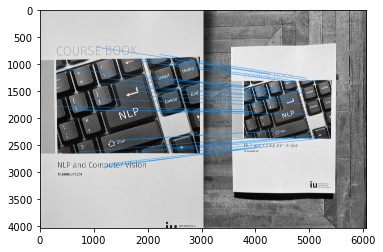

In [6]:
%%time

#extracting keypoints and descriptors from images 1 and 2
keypoints_img_1, descriptors_img_1 = sift_extractor.detectAndCompute(img_1, None)
keypoints_img_2, descriptors_img_2 = sift_extractor.detectAndCompute(img_2, None)

#matching descriptors for both images
matches = feature_matcher.match(descriptors_img_1, descriptors_img_2)

#sorting matches
matches = sorted(matches, key= lambda x:x.distance)

#retrieving first 30 matches from iterable in image
best_matches = cv.drawMatches(img_1, keypoints_img_1, img_2, keypoints_img_2, matches[:30], img_2, **draw_params)

#printing image to output
plt.imshow(best_matches)

#saving image to output folder
cv.imwrite("../output/scale_invariance.jpg", best_matches)

### 2) Rotation invariance with SIFT

CPU times: total: 1h 21min 1s
Wall time: 5min 17s


True

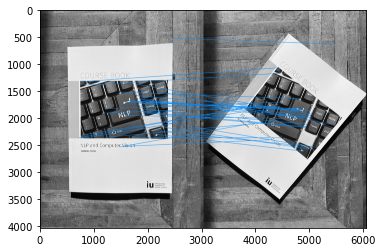

In [5]:
%%time

#extracting keypoints and descriptors from images 2 and 3
keypoints_img_2, descriptors_img_2 = sift_extractor.detectAndCompute(img_2, None)
keypoints_img_3, descriptors_img_3 = sift_extractor.detectAndCompute(img_3, None)

#matching descriptors for both images
matches = feature_matcher.match(descriptors_img_2, descriptors_img_3)

#sorting matches
matches = sorted(matches, key= lambda x:x.distance)

#retrieving first 20 matches from iterable in image
best_matches = cv.drawMatches(img_2, keypoints_img_2, img_3, keypoints_img_3, matches[:30], img_3, **draw_params)

#printing image to output
plt.imshow(best_matches)

#saving image to output folder
cv.imwrite("../output/rotation_invariance.jpg", best_matches)

### 3) Translational invariance w SIFT

CPU times: total: 21min 13s
Wall time: 1min 26s


True

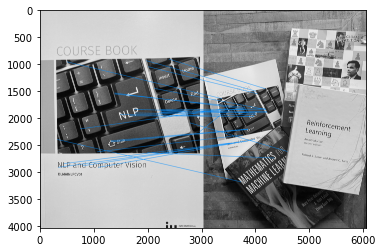

In [7]:
%%time

#extracting keypoints and descriptors from image 4 and 5 with ORB
keypoints_img_1, descriptors_img_1 = sift_extractor.detectAndCompute(img_1, None)
keypoints_img_4, descriptors_img_4 = sift_extractor.detectAndCompute(img_4, None)

#matching descriptors for both images
matches = feature_matcher.match(descriptors_img_1, descriptors_img_4)

#sorting matches
matches = sorted(matches, key=lambda x: x.distance)

#retrieving first 30 matches from iterable in image
best_matches = cv.drawMatches(img_1, keypoints_img_1, img_4, keypoints_img_4, matches[0:30], img_4, **draw_params)

#printing image to output
plt.imshow(best_matches)

#saving image to output folder
cv.imwrite("../output/table_w_books.jpg", best_matches)